In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load raw data in 2001
df = pd.read_csv('D:/Dropbox/Data-Analysis/p6/final/data/2001.csv')
df.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
5967775,2001,12,14,5,704.0,700,1159.0,1155,DL,678,...,14,13,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5967776,2001,12,15,6,708.0,700,1158.0,1155,DL,678,...,9,18,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5967777,2001,12,16,7,656.0,700,1147.0,1155,DL,678,...,7,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5967778,2001,12,17,1,656.0,700,1151.0,1155,DL,678,...,13,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5967779,2001,12,18,2,709.0,700,1158.0,1155,DL,678,...,10,16,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [3]:
len(df)

5967780

In [4]:
pd.isnull(df['Origin']).sum()

0

In [5]:
origin_df = df.groupby('Origin') #5392717
len(origin_df) #number of total airport

231

In [6]:
group_df = df.groupby(['Month','Origin']) #12 http://stackoverflow.com/questions/17679089/pandas-dataframe-groupby-two-columns-and-get-counts
len(group_df) 

2639

In [7]:
# check NaN values
pd.isnull(df['Cancelled']).sum() #http://stackoverflow.com/questions/12765833/counting-the-number-of-true-booleans-in-a-python-list

0

In [8]:
group_total_flights = group_df.count()['Year']
group_total_flights 

Month  Origin
1      ABE         513
       ABI         243
       ABQ        3001
       ACT         240
       ADQ          62
       ALB        1428
       AMA         590
       ANC        1524
       APF         126
       ATL       22377
       AUS        3737
       AVL         124
       AVP         124
       AZO         240
       BDL        3152
       BET          93
       BFL         185
       BGM          62
       BGR         260
       BHM        1692
       BIL         309
       BIS         120
       BMI         151
       BNA        5018
       BOI        1070
       BOS       11937
       BPT         151
       BQN          31
       BRO          26
       BRW          76
                 ...  
12     SFO        7899
       SGF         360
       SHV         366
       SIT          92
       SJC        4980
       SJT         173
       SJU        2342
       SLC        6036
       SMF        3138
       SNA        3266
       SPS         147
       SRQ         3

In [9]:
group_total_cancelled = group_df.sum()['Cancelled']
group_total_cancelled

Month  Origin
1      ABE         22
       ABI         19
       ABQ         70
       ACT         13
       ADQ          7
       ALB         46
       AMA         22
       ANC         73
       APF          4
       ATL       1024
       AUS         83
       AVL          5
       AVP          3
       AZO         17
       BDL         95
       BET          3
       BFL         19
       BGM          0
       BGR         32
       BHM         19
       BIL          6
       BIS          3
       BMI         25
       BNA         83
       BOI         22
       BOS        990
       BPT          9
       BQN          1
       BRO          0
       BRW          9
                 ... 
12     SFO         64
       SGF          2
       SHV          7
       SIT          0
       SJC         40
       SJT          1
       SJU         19
       SLC         57
       SMF         11
       SNA         27
       SPS          4
       SRQ          2
       STL         57
       STT        

In [10]:
df_total = group_total_flights.to_frame().reset_index()
df_total.columns = ['month','origin','num_flights']
df_total

,month,origin,num_flights
0,1,ABE,513
1,1,ABI,243
2,1,ABQ,3001
3,1,ACT,240
4,1,ADQ,62
5,1,ALB,1428
6,1,AMA,590
7,1,ANC,1524
8,1,APF,126
9,1,ATL,22377


In [11]:
df_cancelled = group_total_cancelled.to_frame().reset_index()
df_cancelled.columns = ['month','origin','num_cancelled']
df_cancelled

,month,origin,num_cancelled
0,1,ABE,22
1,1,ABI,19
2,1,ABQ,70
3,1,ACT,13
4,1,ADQ,7
5,1,ALB,46
6,1,AMA,22
7,1,ANC,73
8,1,APF,4
9,1,ATL,1024


In [12]:
grouped_df = pd.merge(df_total,df_cancelled)
grouped_df

,month,origin,num_flights,num_cancelled
0,1,ABE,513,22
1,1,ABI,243,19
2,1,ABQ,3001,70
3,1,ACT,240,13
4,1,ADQ,62,7
5,1,ALB,1428,46
6,1,AMA,590,22
7,1,ANC,1524,73
8,1,APF,126,4
9,1,ATL,22377,1024


In [13]:
grouped_df['cancel_rate'] = 1.0*grouped_df['num_cancelled']/grouped_df['num_flights']
grouped_df

,month,origin,num_flights,num_cancelled,cancel_rate
0,1,ABE,513,22,0.042885
1,1,ABI,243,19,0.078189
2,1,ABQ,3001,70,0.023326
3,1,ACT,240,13,0.054167
4,1,ADQ,62,7,0.112903
5,1,ALB,1428,46,0.032213
6,1,AMA,590,22,0.037288
7,1,ANC,1524,73,0.047900
8,1,APF,126,4,0.031746
9,1,ATL,22377,1024,0.045761


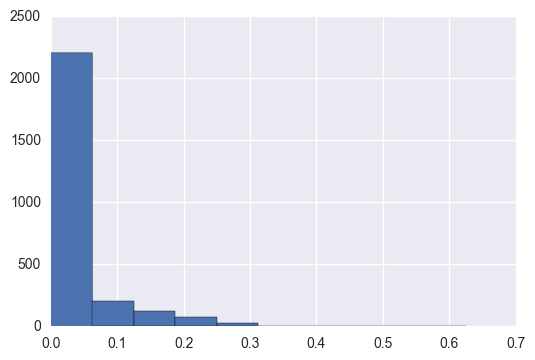

In [14]:
grouped_df['cancel_rate'].hist() 

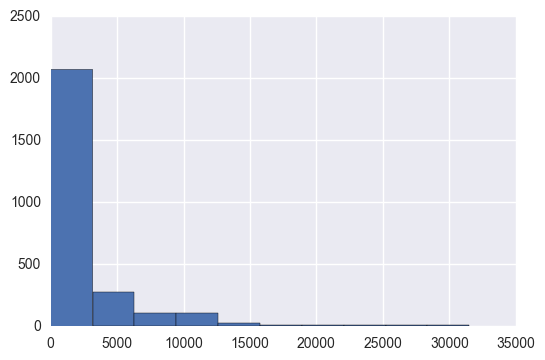

In [15]:
grouped_df['num_flights'].hist() 

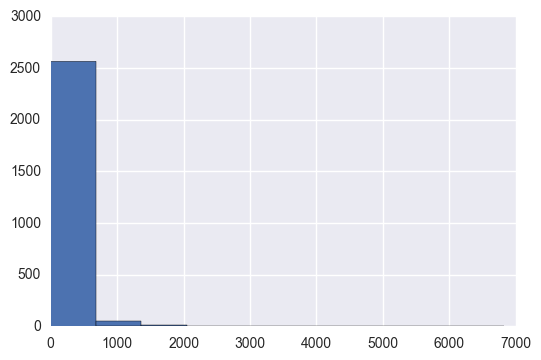

In [16]:
grouped_df['num_cancelled'].hist() 

In [17]:
# add coordinates to each airport
coord = pd.read_csv('D:/Dropbox/Data-Analysis/p6/final/data/airports.csv')
coord

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
2,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
3,6526,00AR,heliport,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,00AR,NaN,00AR,NaN,NaN,NaN
4,6527,00AZ,small_airport,Cordes Airport,34.305599,-112.165001,3810.0,NaN,US,US-AZ,Cordes,no,00AZ,NaN,00AZ,NaN,NaN,NaN
5,6528,00CA,small_airport,Goldstone /Gts/ Airport,35.350498,-116.888000,3038.0,NaN,US,US-CA,Barstow,no,00CA,NaN,00CA,NaN,NaN,NaN
6,6529,00CO,small_airport,Cass Field,40.622200,-104.344002,4830.0,NaN,US,US-CO,Briggsdale,no,00CO,NaN,00CO,NaN,NaN,NaN
7,6531,00FA,small_airport,Grass Patch Airport,28.645500,-82.219002,53.0,NaN,US,US-FL,Bushnell,no,00FA,NaN,00FA,NaN,NaN,NaN
8,6532,00FD,heliport,Ringhaver Heliport,28.846600,-82.345398,25.0,NaN,US,US-FL,Riverview,no,00FD,NaN,00FD,NaN,NaN,NaN
9,6533,00FL,small_airport,River Oak Airport,27.230900,-80.969200,35.0,NaN,US,US-FL,Okeechobee,no,00FL,NaN,00FL,NaN,NaN,NaN


In [63]:
df = grouped_df.merge(coord.drop_duplicates(subset=['iata_code']),left_on='origin',right_on = 'iata_code',how='left')
df = df[df['iso_country'] == 'US'] # only consider US
df

,month,origin,num_flights,num_cancelled,cancel_rate,id,ident,type,name,latitude_deg,...,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,1,ABE,513,22,0.042885,3356,KABE,medium_airport,Lehigh Valley International Airport,40.652100,...,US,US-PA,Allentown,yes,KABE,ABE,ABE,NaN,http://en.wikipedia.org/wiki/Lehigh_Valley_Int...,NaN
1,1,ABI,243,19,0.078189,3357,KABI,medium_airport,Abilene Regional Airport,32.411301,...,US,US-TX,Abilene,yes,KABI,ABI,ABI,NaN,http://en.wikipedia.org/wiki/Abilene_Regional_...,NaN
2,1,ABQ,3001,70,0.023326,16091,KABQ,large_airport,Albuquerque International Sunport Airport,35.040199,...,US,US-NM,Albuquerque,yes,KABQ,ABQ,ABQ,NaN,http://en.wikipedia.org/wiki/Albuquerque_Inter...,NaN
3,1,ACT,240,13,0.054167,3361,KACT,medium_airport,Waco Regional Airport,31.611300,...,US,US-TX,Waco,yes,KACT,ACT,ACT,NaN,http://en.wikipedia.org/wiki/Waco_Regional_Air...,NaN
4,1,ADQ,62,7,0.112903,5353,PADQ,medium_airport,Kodiak Airport,57.750000,...,US,US-AK,Kodiak,yes,PADQ,ADQ,ADQ,NaN,http://en.wikipedia.org/wiki/Kodiak_Airport,NaN
5,1,ALB,1428,46,0.032213,3371,KALB,medium_airport,Albany International Airport,42.748299,...,US,US-NY,Albany,yes,KALB,ALB,ALB,http://www.albanyairport.com/,http://en.wikipedia.org/wiki/Albany_Internatio...,NaN
6,1,AMA,590,22,0.037288,3377,KAMA,large_airport,Rick Husband Amarillo International Airport,35.219398,...,US,US-TX,Amarillo,yes,KAMA,AMA,AMA,NaN,http://en.wikipedia.org/wiki/Rick_Husband_Amar...,NaN
7,1,ANC,1524,73,0.047900,5388,PANC,large_airport,Ted Stevens Anchorage International Airport,61.174400,...,US,US-AK,Anchorage,yes,PANC,ANC,ANC,NaN,http://en.wikipedia.org/wiki/Ted_Stevens_Ancho...,NaN
8,1,APF,126,4,0.031746,19293,KAPF,medium_airport,Naples Municipal Airport,26.152599,...,US,US-FL,Naples,no,KAPF,APF,APF,NaN,http://en.wikipedia.org/wiki/Naples_Municipal_...,NaN
9,1,ATL,22377,1024,0.045761,3384,KATL,large_airport,Hartsfield Jackson Atlanta International Airport,33.636700,...,US,US-GA,Atlanta,yes,KATL,ATL,ATL,http://www.atlanta-airport.com/,http://en.wikipedia.org/wiki/Hartsfield-Jackso...,NaN


In [64]:
df = df[['month','origin','num_flights','num_cancelled', 'cancel_rate','name','iso_region']]
df

,month,origin,num_flights,num_cancelled,cancel_rate,name,iso_region
0,1,ABE,513,22,0.042885,Lehigh Valley International Airport,US-PA
1,1,ABI,243,19,0.078189,Abilene Regional Airport,US-TX
2,1,ABQ,3001,70,0.023326,Albuquerque International Sunport Airport,US-NM
3,1,ACT,240,13,0.054167,Waco Regional Airport,US-TX
4,1,ADQ,62,7,0.112903,Kodiak Airport,US-AK
5,1,ALB,1428,46,0.032213,Albany International Airport,US-NY
6,1,AMA,590,22,0.037288,Rick Husband Amarillo International Airport,US-TX
7,1,ANC,1524,73,0.047900,Ted Stevens Anchorage International Airport,US-AK
8,1,APF,126,4,0.031746,Naples Municipal Airport,US-FL
9,1,ATL,22377,1024,0.045761,Hartsfield Jackson Atlanta International Airport,US-GA


In [72]:
all_regions = df['iso_region'].sort_values()
all_regions

2638    US-AK
2248    US-AK
1175    US-AK
261     US-AK
1179    US-AK
1187    US-AK
2239    US-AK
1155    US-AK
1205    US-AK
1226    US-AK
1228    US-AK
2229    US-AK
2222    US-AK
2219    US-AK
238     US-AK
252     US-AK
2218    US-AK
1146    US-AK
1125    US-AK
1050    US-AK
1055    US-AK
1064    US-AK
294     US-AK
2279    US-AK
1082    US-AK
1132    US-AK
285     US-AK
2271    US-AK
1114    US-AK
1116    US-AK
        ...  
2132    US-WI
531     US-WI
1705    US-WI
585     US-WI
1021    US-WV
1906    US-WV
1387    US-WV
2120    US-WV
946     US-WV
1464    US-WV
495     US-WV
1829    US-WV
1608    US-WV
2047    US-WV
1166    US-WV
1243    US-WV
721     US-WV
272     US-WV
49      US-WV
1685    US-WV
780     US-WY
1443    US-WY
1885    US-WY
107     US-WY
553     US-WY
1664    US-WY
330     US-WY
2099    US-WY
1222    US-WY
2524    US-WY
Name: iso_region, dtype: object

In [36]:
#Census Regions and Divisions of the United States  http://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf

Northeast = ['Maine', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New Hampshire', 
             'Vermont', 'New York', 'Pennsylvania', 'New Jersey']
South = ['Delaware', 'District of Columbia','Florida','Georgia','Maryland','North Carolina','South Carolina',
         'West Virginia', 'Virginia', 'Kentucky', 'Tennessee', 'Alabama', 'Mississippi', 'Arkansas', 'Louisiana', 
         'Texas', 'Oklahoma']
Midwest = ['Ohio', 'Indiana', 'Michigan', 'Illinois', 'Missouri', 'Wisconsin', 'Minnesota', 'Iowa', 
           'Kansas', 'Nebraska', 'South Dakota', 'North Dakota']
West = ['Arizona', 'Colorado', 'Idaho', 'New Mexico', 'Montana','Utah', 'Nevada','Wyoming', 
    'Alaska','California','Washington', 'Oregon', 'Hawaii']

In [73]:
# abbreviation http://www.infoplease.com/ipa/A0110468.html
# only include 51 states, not Puerto Rico or other islands
US_region = {
    'Northeast': ['US-ME', 'US-MA', 'US-RI', 'US-CT', 'US-NH','US-VT', 'US-NY', 'US-PA', 'US-NJ'],
    'South':['US-DE', 'US-DC','US-FL','US-GA','US-MD','US-NC','US-SC','US-WV', 'US-VA', 'US-KY',
             'US-TN', 'US-AL', 'US-MS', 'US-AR', 'US-LA','US-TX', 'US-OK'],
    'Midwest':['US-OH', 'US-IN', 'US-MI', 'US-IL', 'US-MO', 'US-WI', 'US-MN', 'US-IA', 'US-KS', 
               'US-NE', 'US-SD', 'US-ND'],
    'West':['US-AZ', 'US-CO', 'US-ID', 'US-NM', 'US-MT','US-UT', 'US-NV','US-WY', 'US-AK','US-CA',
            'US-WA', 'US-OR', 'US-HI'],
    'US average': ['US-ME', 'US-MA', 'US-RI', 'US-CT', 'US-NH','US-VT', 'US-NY', 'US-PA', 'US-NJ','US-DE', 'US-DC','US-FL','US-GA','US-MD','US-NC','US-SC','US-WV', 'US-VA', 'US-KY',
             'US-TN', 'US-AL', 'US-MS', 'US-AR', 'US-LA','US-TX', 'US-OK','US-OH', 'US-IN', 'US-MI', 'US-IL', 'US-MO', 'US-WI', 'US-MN', 'US-IA', 'US-KS', 
               'US-NE', 'US-SD', 'US-ND','US-AZ', 'US-CO', 'US-ID', 'US-NM', 'US-MT','US-UT', 'US-NV','US-WY', 'US-AK','US-CA',
            'US-WA', 'US-OR', 'US-HI']
}

In [75]:
len(US_region['US average'])

51

In [76]:
def region_by_month(region):
    '''
    select rows for each US_region: Northeast, South, Midwest, West
    group by month to get total flights and canceled flights for the given region
    use these 2 values to calculate regional cancel rate
    '''
    region_df = df[df['iso_region'].isin(US_region[region])]
    region_by_month =  region_df.groupby('month').sum()
    region_by_month['cancel_rate'] = region_by_month['num_cancelled']/region_by_month['num_flights']
    region_by_month = region_by_month.reset_index() ## http://stackoverflow.com/questions/21767900/how-to-move-pandas-data-from-index-to-column-after-multiple-groupby
    region_by_month['name'] = region;
    return region_by_month

In [79]:
us_df = region_by_month('US average')
northeast_df = region_by_month('Northeast')
south_df = region_by_month('South')
midwest_df = region_by_month('Midwest')
west_df = region_by_month('West')

In [80]:
# http://chrisalbon.com/python/pandas_join_merge_dataframe.html
final_df =  pd.concat([df,us_df,northeast_df,south_df,midwest_df,west_df])

In [81]:
final_df = final_df.sort_values(['month','origin'])

In [82]:
final_df

,cancel_rate,iso_region,month,name,num_cancelled,num_flights,origin
0,0.042885,US-PA,1,Lehigh Valley International Airport,22,513,ABE
1,0.078189,US-TX,1,Abilene Regional Airport,19,243,ABI
2,0.023326,US-NM,1,Albuquerque International Sunport Airport,70,3001,ABQ
3,0.054167,US-TX,1,Waco Regional Airport,13,240,ACT
4,0.112903,US-AK,1,Kodiak Airport,7,62,ADQ
5,0.032213,US-NY,1,Albany International Airport,46,1428,ALB
6,0.037288,US-TX,1,Rick Husband Amarillo International Airport,22,590,AMA
7,0.047900,US-AK,1,Ted Stevens Anchorage International Airport,73,1524,ANC
8,0.031746,US-FL,1,Naples Municipal Airport,4,126,APF
9,0.045761,US-GA,1,Hartsfield Jackson Atlanta International Airport,1024,22377,ATL


In [86]:
final_df['cancel_rate'].max()

0.62542425177414374

In [85]:
final_df.to_csv('D:/Dropbox/Data-Analysis/p6/final/data/cancel_rate_by_region_2001.csv')